# Spectrogram extraction

In [66]:
import os
from pathlib import Path
import pickle
import numpy as np
from utils import extract_spectrogram
import matplotlib.pyplot as plt
import random

## 1 - Setting global variables

In [86]:
db_directory = Path(r"C:\Study\DB\SpeechCommands")
ignore_list = [
    r"C:\Study\DB\SpeechCommands\_background_noise_"
]
random.seed(1)

## 2 - Getting list of all sound files in db

In [68]:
file_list = [f for f in db_directory.resolve().glob('**/*') if f.is_file() and f.suffix == '.wav'  and 
             all(ignore_obj not in str(f) for ignore_obj in ignore_list)]


### shu

## 3 - Spectrogram extraction

In [69]:
spectrograms = []
for i, f in enumerate(file_list):
    print("\r{} out of {}".format(i, len(file_list)), end='')
    spectrogram = extract_spectrogram(f)
    spectrograms.append(spectrogram)
print("extraction finished")

with open('spectrograms.pickle', 'wb') as f:
    pickle.dump(spectrograms, f, pickle.HIGHEST_PROTOCOL)
print("saving finished")

with open('file_list.pickle', 'wb') as f:
    pickle.dump(file_list, f, pickle.HIGHEST_PROTOCOL)
print("saving finished")

316 out of 64721

C:\Study\SOM\utils.py:14: RuntimeWarning: divide by zero encountered in log10
  dBS = 20 * np.log10(spectogram)


64720 out of 64721extraction finished
saving finished
saving finished


## 4 - Pad or crop to the same length

In [75]:
sample_length = 150
for i, s in enumerate(spectrograms):
    print("\r{} out of {}".format(i + 1, len(spectrograms)), end='')
    length = s.shape[-1]
    if length < 150:
        # pad
        s = np.pad(s, ((0, 0), (0, sample_length - length)), 'constant', constant_values=(0.))
    else:
        s = s[:,:sample_length]
    spectrograms[i] = s
print("padding finished")

with open('spectrograms_normed_length.pickle', 'wb') as f:
    pickle.dump(spectrograms, f, pickle.HIGHEST_PROTOCOL)
print("saving finished, filename:{}".format('spectrograms_normed_length.pickle'))

546 out of 64721

1486 out of 64721

64721 out of 64721padding finished
saving finished, filename:spectrograms_normed_length.pickle


## 5 - Stack samples

In [76]:
s = np.stack(spectrograms, axis=0)

## 6 - Norm values

In [77]:
spectrograms_norm = s / np.max(s)

## 7 - See some exmaples

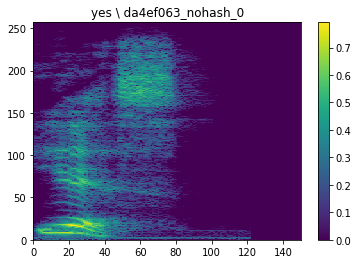

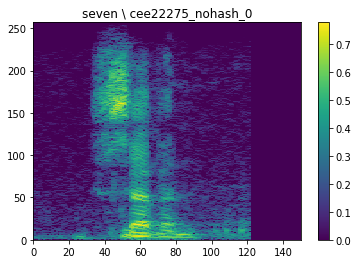

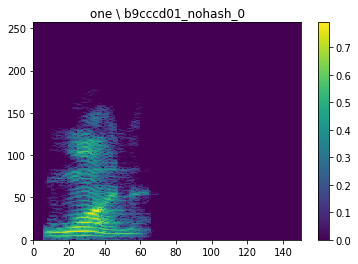

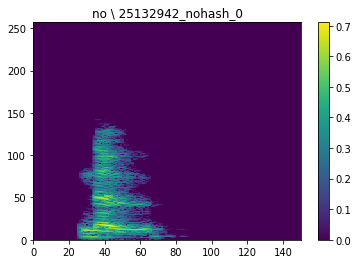

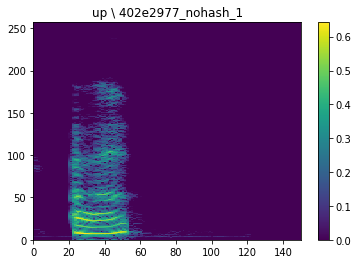

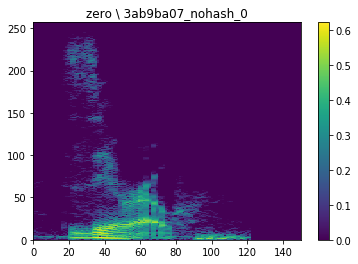

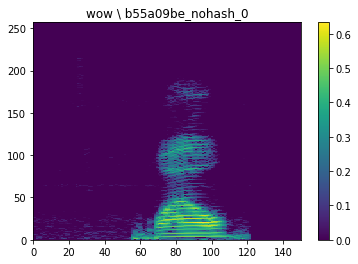

In [80]:
% matplotlib inline
# plt.imshow(spectrograms[0])
random.seed(1)
idx = list(range(len(spectrograms_norm)))
random.shuffle(idx)
idx = idx[:7]
for i in idx:
    plt.pcolormesh(spectrograms_norm[i])
    plt.colorbar()
    plt.title("{} \ {}".format(file_list[i].parent.stem, file_list[i].stem))
    plt.show()

## 7 - Flatten values

In [84]:
spectrograms_flatten = spectrograms_norm.reshape(-1, spectrograms_norm.shape[0]).T
print("shape of the spectrograms array: ", spectrograms_norm.shape)
print("shape of the flattened spectrograms array: ", spectrograms_flatten.shape)

shape of the spectrograms array:  (64721, 257, 150)
shape of the flattened spectrograms array:  (64721, 38550)


## 8 - Save training set

In [85]:
with open('spectrograms_training.pickle', 'wb') as f:
    pickle.dump(spectrograms_flatten, f, pickle.HIGHEST_PROTOCOL)
print("training set saved")

training set saved
